# Optimization for Logistic Regression
Source Code: [logistic-regression.py](https://github.com/KatieMacalintal/KatieMacalintal.github.io/blob/main/posts/optimization/logistic_regression.py)

In this blog post, we use logistic regression and gradient descent to efficiently find a hyperplane that can separate a binary classified data set with minimal loss, in other words minimize the empircal risk. 

## Implementation

In our `LogisticRegression` class, we implemented a `fit` and `fit_stochastic` function that both take the data set `X` and their expected labels `y`.  

In the `fit` function, we are looking for the weights `w` (which includes the bias term) such that it mimimizes our loss. In order to find this `w`, we use the gradient descent framework with a convex loss function, which combined allows us to search for this local minima. 
In this framework, we compute the gradient of our loss function: $$\ell(\hat{y}, y)=-y\log\sigma(\hat{y})-(1-y)\log(1-\sigma(\hat{y})),$$ where $\sigma$ is the logistic sigmoid function and $\hat{y}$ is our prediction $\langle w,x_i \rangle$. 
This loss function, known as the logistic loss function, is convient for us because it is strictly convex in it's first argument meaning that our loss can have at most one minimum. 
The gradient of this loss function turns out to be: $$\nabla L(w)=(1/n)\sum_{i=1}^n (\sigma(\hat{y_i})-y_i)x_i.$$ This gradient equation is implemented in the `gradient` function of our `LogisticRegressions` class as  

`np.mean(((self.sigmoid(y_) - y)[:,np.newaxis]) * X, axis = 0)`.  

Then, as stated in Theorem 2 of [Optimization with Gradient Descent](https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/gradient-descent.html) notes, because our gradent is a descent direction, we adjust our `w` by stepping in the direction of descent, since we are looking for a `w` such that our loss is at the lowest it can be. 
We do this until we either reach the specified `max_epochs` or converge. 
In this case, convergence is until the improvement in the our loss function is small enough in magnitiude.

The `fit_stochastic` function is very similar to the `fit` function, expect here we don't compute the complete gradient, we instead compute the gradient on a specified batch size. In this function, there is also the option to specify whether one would like to use momentum. 

## Experiments and Findings
Before we conduct any experiments, we need to import and define relevant extensions, classes, and functions.

In [2]:
from logistic_regression import LogisticRegression # source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# Graph fitted line and loss function
def graph_fit_and_loss(X, y, LR):
    fig, axarr = plt.subplots(1, 2)

    axarr[0].scatter(X[:,0], X[:,1], c = y)
    axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

    f1 = np.linspace(-3, 3, 101)

    p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

    axarr[1].plot(LR.loss_history)
    axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
    plt.tight_layout()

### Gradient Descent and Stochastic Gradient Descent

We first create a set of data with 2 features and see that their labels slightly overlap with each other. 

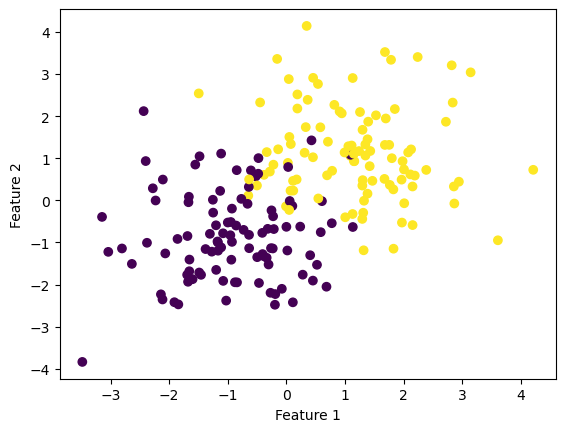

In [28]:
# Make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

We can then fit this data using our `fit` method, which uses gradient descent, and `fit_stochastic`, which used batch gradient descent. When we give these fit methods a reasonable learning rate $\alpha$, then we would expect them to converge. 

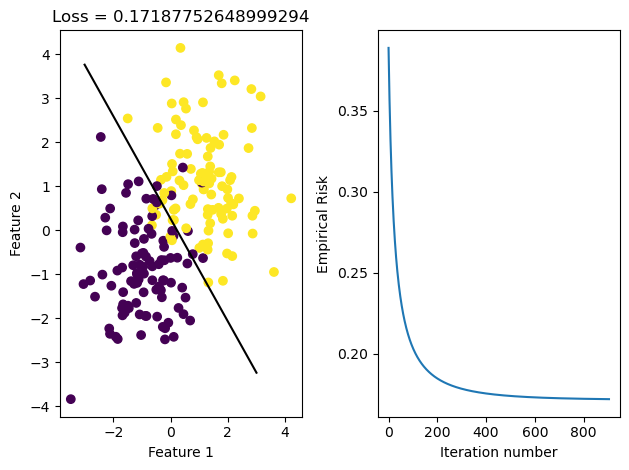

In [29]:
# Fit the model
LR_reg = LogisticRegression()
LR_reg.fit(X, y, alpha = 0.1, max_epochs = 10000)

graph_fit_and_loss(X, y, LR_reg)
plt.savefig('gradient_descent.png')

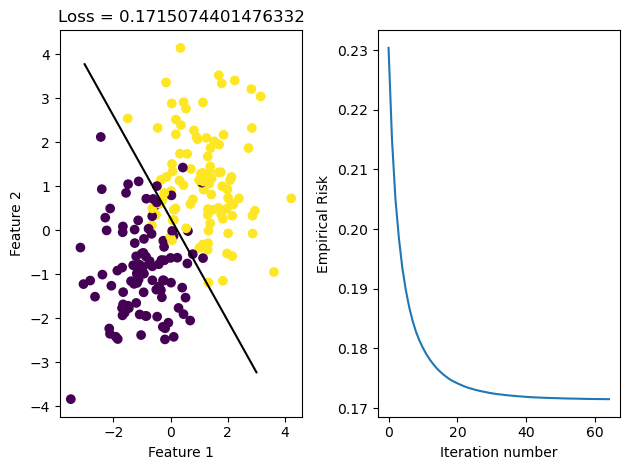

In [30]:
# Fit the model
LR_stoch = LogisticRegression()
LR_stoch.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10)

graph_fit_and_loss(X, y, LR_stoch)

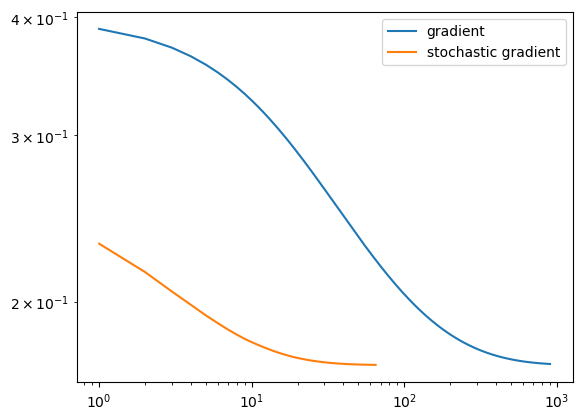

In [32]:
num_steps = len(LR_reg.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_reg.loss_history, label = "gradient")

num_steps = len(LR_stoch.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_stoch.loss_history, label = "stochastic gradient")

plt.loglog()

legend = plt.legend() 

After running these methods, we see that the data was able to converge in both cases. We see that they both reach the same loss, but the stochastic gradient descent reaches it in fewer iterations, meaning it iterated over all data points less times. This may be because it makes updates to `w` more frequently than regular gradient descent does, since it samples its `w` on smaller portions of data set `X` and updates it appropriately. 

## Learning Rate $\alpha$

It's important that the learning rate $\alpha$ is relatively small. Before we set our alpha to 0.1, but if we use the same data and set $\alpha$ to a too high number we will see that we never converge in both regular gradient descent and stochastic gradient descent. If $\alpha$ too large, we might be updating `w` by too much such that it overshoots where the minimum actually is resulting in a flucuating loss history. 

/Users/katiemacalintal/Desktop/Machine Learning/KatieMacalintal.github.io/posts/optimization/logistic_regression.py:54: UserWarning: WARNING: Could not converge
  warnings.warn("WARNING: Could not converge")


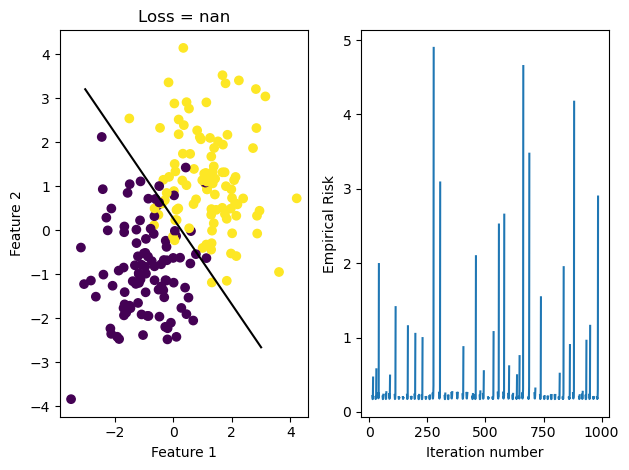

In [33]:
# Fit the model
LR = LogisticRegression()
LR.fit(X, y, alpha = 170, max_epochs = 1000)

graph_fit_and_loss(X, y, LR)

/Users/katiemacalintal/Desktop/Machine Learning/KatieMacalintal.github.io/posts/optimization/logistic_regression.py:119: UserWarning: WARNING: Could not converge
  warnings.warn("WARNING: Could not converge")


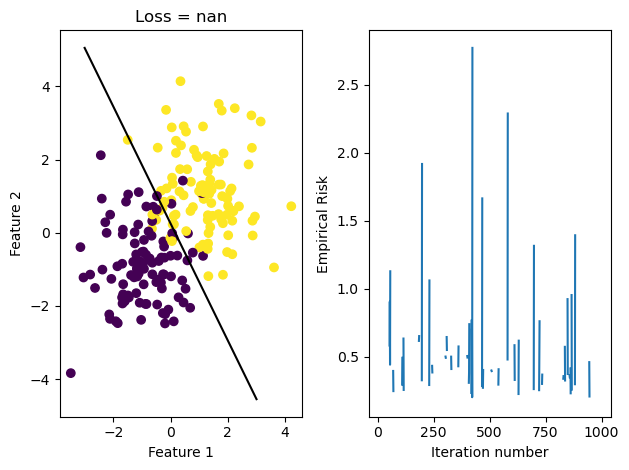

In [34]:
LR.fit_stochastic(X, y, alpha = 75, max_epochs = 1000, batch_size = 50)

graph_fit_and_loss(X, y, LR)

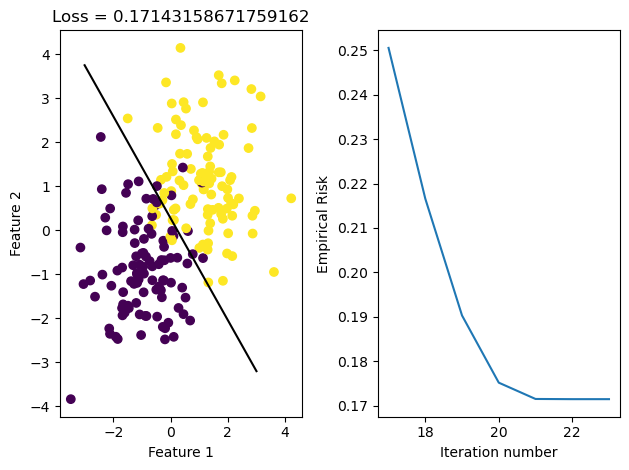

In [35]:
LR.fit(X, y, alpha = 75, max_epochs = 1000)

graph_fit_and_loss(X, y, LR)

Through graphing the loss history, we see that it fluctuates greatly due to the large $\alpha$ size. We also see that because stochastic gradient descent updates `w` more often, our `fit_stochastic` doesn't converge with a high learning rate that our regular gradient descent method can actually converge with. 

## Stochastic Gradient Descent: Batch Size

Now, we will run some experiments on how the batch size influences convergence. We will do this with a larger data set of 1000 points, which have 10 features.

In [54]:
# Make the data
p_features = 11
X, y = make_blobs(n_samples = 1000, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

def graph_loss(LR):
    fig, axarr = plt.subplots(1, 1)

    axarr.plot(LR.loss_history)
    axarr.set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = f"Loss = {LR.loss_history[-1]}")
    plt.tight_layout()

In the [Disenroth, Faisal, and Soon reading](https://via.hypothes.is/https://mml-book.github.io/book/mml-book.pdf), they observe that "Large mini-batch sizes will provide accurate estimates of the gradient, reducing the variance in the parameter update. ... The reduction in variance leads to more stable convergence, but each graident calculation will be more expensive" (232). On the other hand, they observe that "small mini-batches are quick to estimate. If we keep the mini-batch size small, the noise in our graident estimate will allow us to get out of some bad local optima" (232).
We'll conduct experiments such that our `batch_size` decreases in size, and we'll inspect their loss to see how Disenroth, Faisal, and Soon's observations hold. 

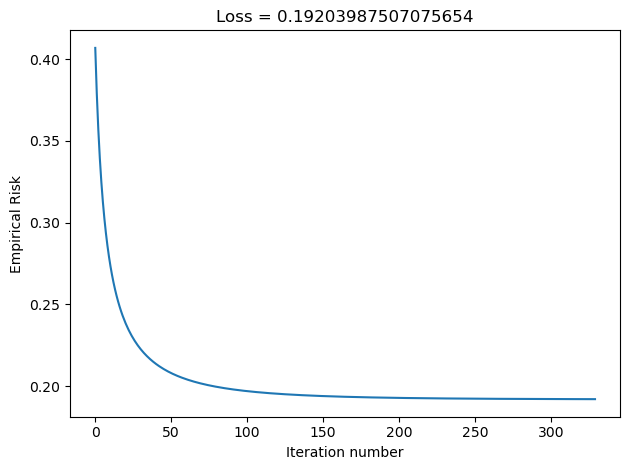

In [55]:
LR_500 = LogisticRegression()
LR_500.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 500)

graph_loss(LR_500)

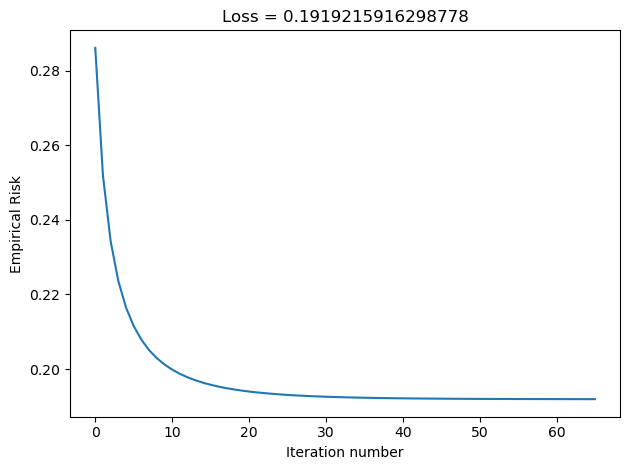

In [56]:
LR_50 = LogisticRegression()
LR_50.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 50)

graph_loss(LR_50)

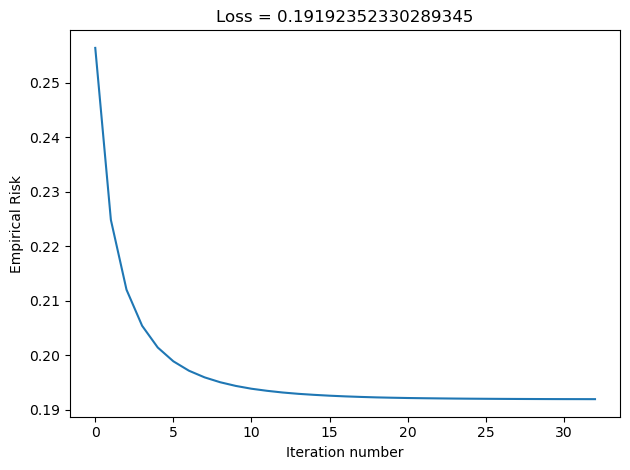

In [57]:
LR_25 = LogisticRegression()
LR_25.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 25)

graph_loss(LR_25)

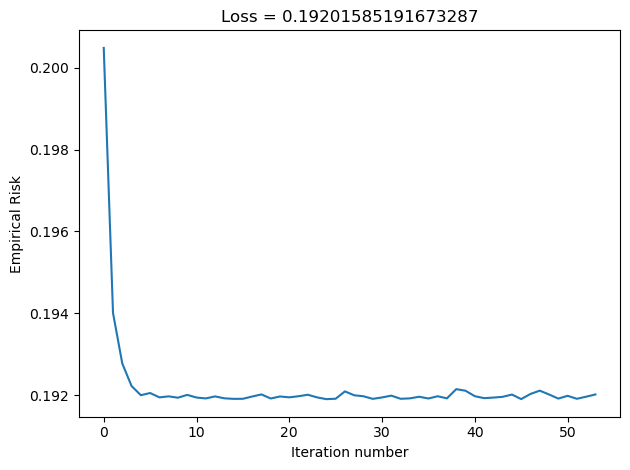

In [62]:
LR_5 = LogisticRegression()
LR_5.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 5)

graph_loss(LR_5)

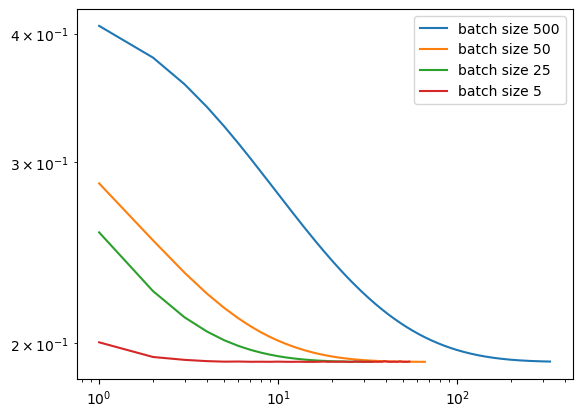

In [64]:
num_steps = len(LR_500.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_500.loss_history, label = "batch size 500")

num_steps = len(LR_50.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_50.loss_history, label = "batch size 50")

num_steps = len(LR_25.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_25.loss_history, label = "batch size 25")

num_steps = len(LR_5.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_5.loss_history, label = "batch size 5")

plt.loglog()

legend = plt.legend() 

We see that as our batch size gets smaller, our number of iterations over the all data points in `X` also gets smaller. This relates to why stochastic gradient descent uses fewer iterations as gradient descent. If our batch size is large, we do not update `w` as frequently as we would have if it were smaller.  Based on our loss graphs, we also see that, as noted by Disenroth, Faisal, and Soon, stochastic gradient descent with large batch sizes have a smooth convergence, and small batch sizes have a noiser convergence. 

## Momentum

In the `fit_stochastic` function we also implemented the option to use `momentum`, which takes into account our previously taken step and allows us to continue moving along that direction if the update was good. In the case shown below, we see that momentum was able to result in less iterations over the data, but understanding when exactly momentum would significantly speed up convergence will require more experiments. 

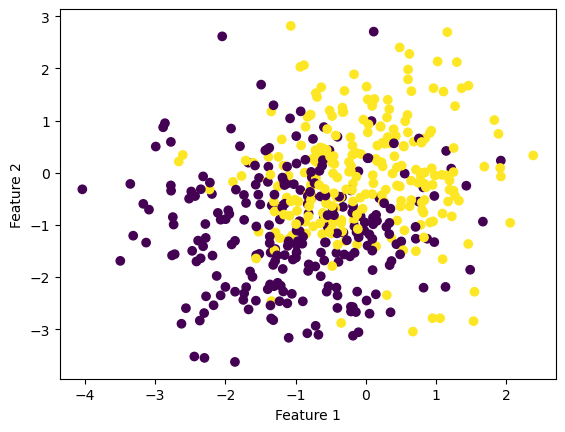

In [22]:
# Make the data
X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(-1, -1), (0, 0)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

LR = LogisticRegression()

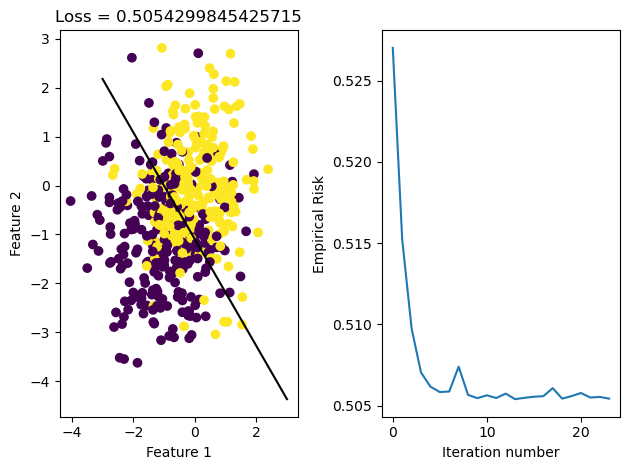

In [23]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = False)
graph_fit_and_loss(X, y, LR)

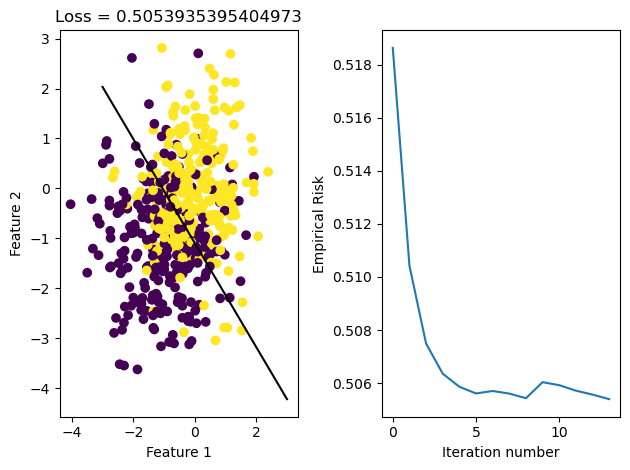

In [26]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = True)
graph_fit_and_loss(X, y, LR)